<a href="https://colab.research.google.com/github/BogdanTurbal/cm_lab_1_pos_9/blob/main/cm_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

import matplotlib.pyplot as plt

# Task 1

In [ ]:
def underintegr_func(x):
  return -np.log(np.cos(x))

In [ ]:
def underintegr_func_2(x):
  arg = np.sin(x) / x
  arg[np.where(x == 0)] = 1
  res = np.log(arg)
  return res

In [ ]:
def compute_integral(start, end, n_step, func):
  steps = np.linspace(start, end, n_step)
  h = steps[1] - steps[0]
  func_vals = func(steps)
  sum_i = np.sum(func_vals[1:-1])
  sum_i += (func_vals[0] + func_vals[-1]) / 2
  sum_i *= h
  return sum_i

In [ ]:
def get_n(xn, eps):
  h = np.sqrt((np.cos(xn)**2 * 12 * eps) / xn)
  return int(1 / h) + 1

In [ ]:
# res = underintegr_func(np.linspace(0, 1, 100))

In [ ]:
x_n = np.linspace(0, np.pi / 2, 19)

In [ ]:
#x_n[0]

In [ ]:
start_epsilon = 1e-3

In [ ]:
itegr_0 = compute_integral(0, np.pi / 36, int(1 / start_epsilon), func=underintegr_func)
print(itegr_0)

0.00011084654777260447


In [ ]:
opt_epsilon = 5e-6

In [ ]:
f_x = [0]
for i in range(1, 19 - 1):
  n = get_n(x_n[i], opt_epsilon)
  #print(n)
  itegr = compute_integral(0, x_n[i], n, func=underintegr_func)
  f_x.append(itegr)
f_x.append(0.861452 - compute_integral(0, np.pi/2, 59, func=underintegr_func_2))

<ipython-input-125-09bbfcece814>:2: RuntimeWarning: invalid value encountered in divide
  arg = np.sin(x) / x


In [ ]:
f_x

[0,
 0.0001108849422868527,
 0.0008889646325825894,
 0.003011674572119429,
 0.007177771301019508,
 0.014119695396346934,
 0.02461829833989367,
 0.03952111082078132,
 0.059766443210387946,
 0.08641570859396273,
 0.1206997752811985,
 0.1640875464528735,
 0.2183934979524218,
 0.2859573978642788,
 0.3699704921062198,
 0.47513961228408863,
 0.6092937873029063,
 0.7886658067530636,
 1.0888320846026627]

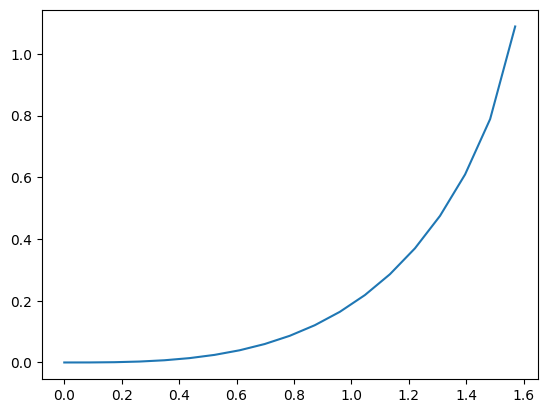

In [ ]:
plt.plot(x_n, f_x)

In [ ]:
# errors = [0]
# for i in range(1, 18):
#   errors.append(1 / np.cos(x_n[i])**2)

In [ ]:
# plt.plot(errors)

# Task 2

In [ ]:
def func(x):
  denum = np.sqrt(x)
  res = (np.exp(x) - 1 - x - np.power(x, 2) / 2 - np.power(x, 3) / 6) / denum
  res[np.where(x == 0)] = 0
  return res

In [ ]:
compute_integral(0, 1, 100, func=func)

<ipython-input-146-d75687f5b6c7>:3: RuntimeWarning: invalid value encountered in divide
  res = (np.exp(x) - 1 - x - np.power(x, 2) / 2 - np.power(x, 3) / 6) / denum


0.01101941403266142

# Task 3

In [ ]:
def func_2(x):
  return 1 / (1 + np.power(x, 3))

In [ ]:
def compute_integral_simpson(start, end, n_step, func):
  steps = np.linspace(start, end, n_step)
  h = steps[1] - steps[0]
  func_vals = func(steps)
  sum_i = 0
  for i in range(1, n_step, 2):
    sum_i += 4 * func_vals[i]

  for i in range(2, n_step-1, 2):
    sum_i += 2 * func_vals[i]

  sum_i += func_vals[0] + func_vals[-1]
  #sum_i += (func_vals[0] + func_vals[-1]) / 2
  sum_i *= h / 3
  return sum_i

In [ ]:
por_acc = 4

In [ ]:
def runge_process(start, end, func, eps, init_steps=50):
  n_step = init_steps
  integ_1, integ_2 = compute_integral_simpson(start, end, n_step, func_2), compute_integral_simpson(start, end, n_step * 2, func_2)
  n_step *= 2
  while np.abs(integ_1 - integ_2) / (2 ** por_acc - 1) > eps:
    integ_1 = integ_2
    n_step *= 2
    integ_2 = compute_integral_simpson(start, end, n_step, func_2)
  print(n_step)
  return integ_2

In [ ]:
compute_integral_simpson(2, 400, 1000, func_2)

0.1192559128418185

In [ ]:
runge_process(2, 400, func_2, 0.0025, init_steps=100)

400


0.12088296726525855